# **K-Means Clustering**
Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

## **Table of Contents**

* [k-Means on a randomly generated dataset](#random)
<ul>

  * [Setting up K-Means](#SetUP)
  * [Creating the Visual Plot](#Visual)
</ul>  


* [Customer Segmentation with K-Means](#Customer)
<ul>

  * [Dataset Information](#Dataset)
  * [Method Development: Setting up the K Means Clustering model](#Method)
  * [Model Evaluation](#Evaluation)
</ul>

<br><br>
**Import required library packages:**

In [1]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Set up a random seed using numpy's random.seed() function, where the seed will be set to 0

In [2]:
np.random.seed(0)

Make random clusters of points by using the **make_blobs** class. 

<b><u>Input</u></b>

*   **n_samples:** The total number of points equally divided among clusters. Choose a number from >1500 for K means, as it can handle large datasets. 
<ul>
*   **Value will be:** 5000
</ul>
*   **centers:** The number of centers to generate, or the fixed center locations. Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers
<ul>
*   **Value will be:** [[4, 4], [-2, -1], [2, -3],[1,1]]
</ul>
*   **cluster_std:** The standard deviation of the clusters. The larger the number, the further apart the clusters. Choose a number between 0.5-1.5. 
<ul>
*   **Value will be:** 0.9
</ul>

**<u>Output</u>**

*   **X:** Array of shape [n_samples, n_features]. (Feature Matrix)
<ul>
*   The generated samples.
</ul>
*   **y:** Array of shape [n_samples]. (Response Vector)
<ul>
*   The integer labels for cluster membership of each sample.
</ul>

In [3]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [4]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [5]:
y

array([1, 2, 2, ..., 0, 1, 1])

Plot the scatter plot of the randomly generated data.

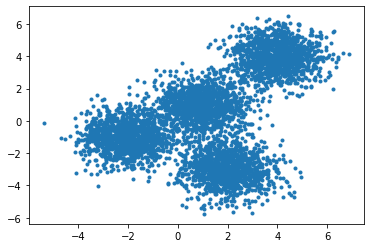

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.');

### **Setting up K-Means**<a name="SetUP"></a>
The KMeans class has many parameters that can be used, but we will be using these three:

**init:** Initialization method of the centroids. 
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
**n_clusters:** The number of clusters to form as well as the number of centroids to generate. 
    <ul>
    <li>Value will be: 4 (since we have 4 centers)</li> 
    </ul>
**n_init:** Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
    <ul> 
    <li> Value will be: 12 </li> 
    </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called **k_means**.

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now fit the KMeans model with the feature matrix created above, **X**

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' **.labels_** attribute and save it as **k_means_labels**. Also get the coordinates of the cluster centers using KMeans' **.cluster_centers_** and save it as **k_means_cluster_centers**

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### **Creating the Visual Plot**<a name="Visual"></a>

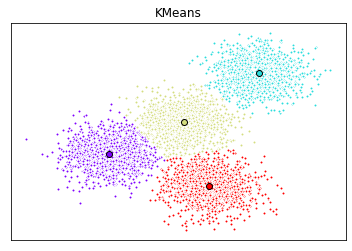

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))
# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.rainbow(np.linspace(0, 1, len(set(k_means_labels))))
# Create a plot
ax = fig.add_subplot(1, 1, 1)
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')
# Remove x-axis ticks
ax.set_xticks(())
# Remove y-axis ticks
ax.set_yticks(())
# Show the plot
plt.show()

Try to cluster the above dataset into 3 clusters.

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
print(k_means_labels)
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[1 2 2 ... 0 1 1]
[[ 3.70503248  3.70030577]
 [-0.8042542  -0.16952334]
 [ 2.02030226 -2.94614399]]


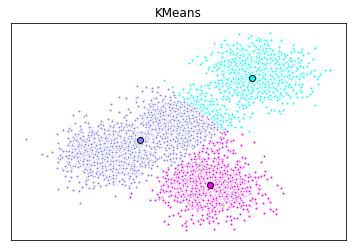

In [13]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))
# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.cool(np.linspace(0, 1, len(set(k_means_labels))))
# Create a plot
ax = fig.add_subplot(1, 1, 1)
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-1, 0], [2, -3]])), colors):
    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')
# Remove x-axis ticks
ax.set_xticks(())
# Remove y-axis ticks
ax.set_yticks(())
# Show the plot
plt.show()

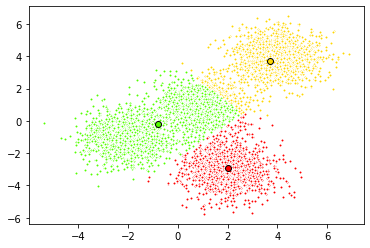

In [14]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.prism(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

**Customer Segmentation with K-Means**<a name="Customer"></a>

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

In [15]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2022-04-20 15:34:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2022-04-20 15:34:37 (2.03 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [16]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### **Data Pre-processing**
Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, drop this feature and run clustering.

In [17]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. Use __StandardScaler()__ to normalize the dataset.

In [18]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [19]:
df['Defaulted'] = df['Defaulted'].fillna(0)

In [20]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Customer Id', 'Defaulted'],axis=1)
X = X.values
X

array([[41.   ,  2.   ,  6.   , ...,  0.124,  1.073,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  4.582,  8.218, 12.8  ],
       [33.   ,  2.   , 10.   , ...,  6.111,  5.802, 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  2.802,  3.21 , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.116,  0.696,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  1.866,  3.638,  8.6  ]])

In [21]:
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

## **Method Development:**<a name="Method"></a>

In [22]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 

## **Model Evaluation - K Means Clustering**<a name="Evaluation"></a>
Assign the labels to each row in dataframe.

In [23]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


Check the centroid values by averaging the features in each cluster.

In [24]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.477273,42.590909,1.954545,16.255682,95.437500,4.014068,7.52546,0.210227,14.203977
1,429.422849,33.054896,1.646884,6.557864,33.942136,0.940387,1.91762,0.216617,9.118694


### **Visualize the distribution of customers based on their age and income**

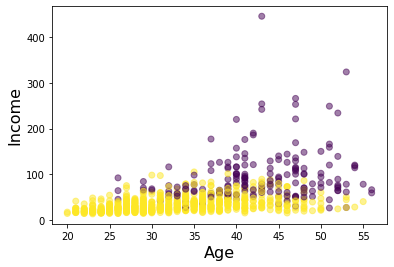

In [25]:
plt.scatter(X[:, 0], X[:, 3],  c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.show();

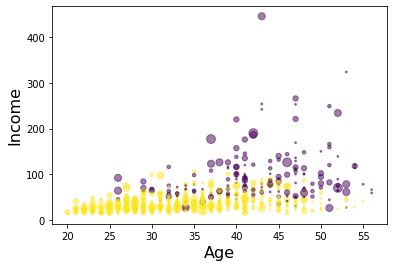

In [26]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.show();

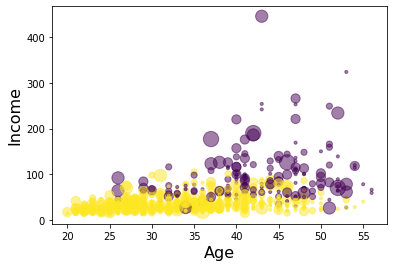

In [27]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=3* area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.show();

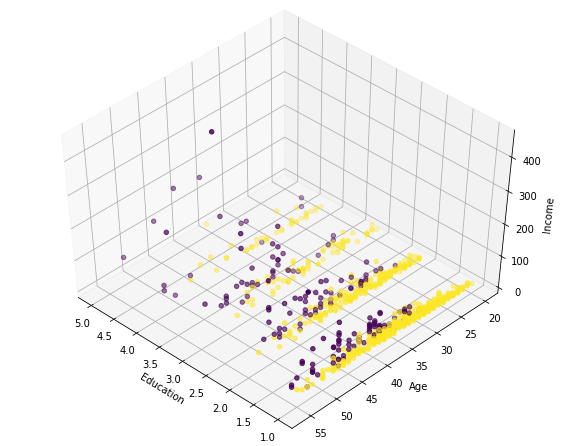

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float));

k-means will partition the customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

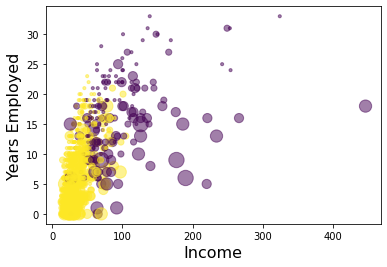

In [29]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 3], X[:, 2], s=3* area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Income', fontsize=16)
plt.ylabel('Years Employed', fontsize=16)
plt.show();

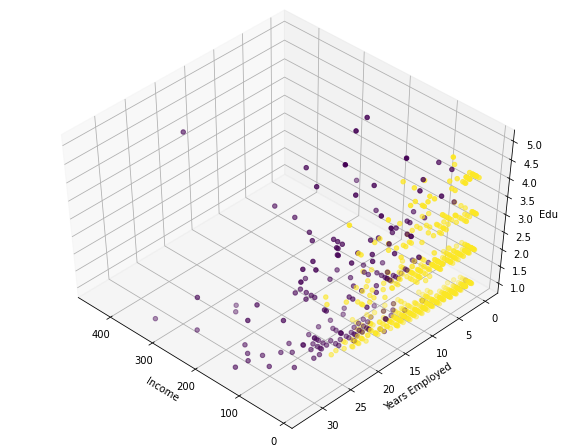

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Income')
ax.set_ylabel('Years Employed')
ax.set_zlabel('Edu')
ax.scatter(X[:, 3], X[:, 2], X[:, 1], c= labels.astype(float));

In [31]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio', 'Clus_km'],
      dtype='object')

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Clus_km'],df['Defaulted']))
print(classification_report(df['Clus_km'],df['Defaulted']))


[[139  37]
 [528 146]]
              precision    recall  f1-score   support

           0       0.21      0.79      0.33       176
           1       0.80      0.22      0.34       674

    accuracy                           0.34       850
   macro avg       0.50      0.50      0.34       850
weighted avg       0.68      0.34      0.34       850



In [33]:
from sklearn.metrics import accuracy_score
accuracy = (df['Clus_km'] == df['Defaulted']).sum() / len(df['Defaulted'])
print('Accuracy of K Means Clustering model calculated manually is ', accuracy.round(2), '%')
print('Accuracy of K Means Clustering model is {:.2f} % '.format(accuracy_score(df['Clus_km'],df['Defaulted'])))
print('\n', '\n','Confusion Matrix of K Means Clustering model:' '\n', confusion_matrix(df['Clus_km'],df['Defaulted']))
print('\n', '\n','Classification Report for K Means Clustering model:' '\n',classification_report(df['Clus_km'],df['Defaulted']))

Accuracy of K Means Clustering model calculated manually is  0.34 %
Accuracy of K Means Clustering model is 0.34 % 

 
 Confusion Matrix of K Means Clustering model:
 [[139  37]
 [528 146]]

 
 Classification Report for K Means Clustering model:
               precision    recall  f1-score   support

           0       0.21      0.79      0.33       176
           1       0.80      0.22      0.34       674

    accuracy                           0.34       850
   macro avg       0.50      0.50      0.34       850
weighted avg       0.68      0.34      0.34       850



In [34]:
y_test = df['Defaulted']

In [35]:
y_pred = k_means.predict(Clus_dataSet)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of K Means Clustering model calculated manually is ', accuracy.round(2), '%')
print('Accuracy of K Means Clustering model is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of K Means Clustering model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for K Means Clustering model:' '\n',classification_report(y_test, y_pred))

Accuracy of K Means Clustering model calculated manually is  0.34 %
Accuracy of K Means Clustering model is 0.34 % 

 
 Confusion Matrix of K Means Clustering model:
 [[139 528]
 [ 37 146]]

 
 Classification Report for K Means Clustering model:
               precision    recall  f1-score   support

         0.0       0.79      0.21      0.33       667
         1.0       0.22      0.80      0.34       183

    accuracy                           0.34       850
   macro avg       0.50      0.50      0.34       850
weighted avg       0.67      0.34      0.33       850



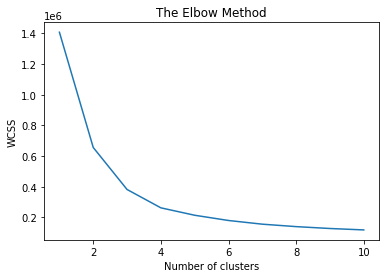

In [37]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # init=k-means++ for avoiding to fall into the random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()